In [50]:
%matplotlib inline

### (a) Prepare MNIST dataset

Download MNIST dataset `mnist.mat` from Canvas and put into your Google Drive.
Mount your Google Drive to this notebook.

In [51]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Load MNIST dataset from your Google Drive. 

In [52]:
from scipy.io import loadmat
mnist = loadmat('/content/gdrive/My Drive/mnist.mat')
traindata = mnist['traindata'][:50000]
trainlabels = mnist['trainlabels'].ravel()[:50000]
validdata = mnist['traindata'][50000:]
validlabels = mnist['trainlabels'].ravel()[50000:]
testdata = mnist['testdata']
print(traindata.shape)
print(trainlabels.shape)
print(validdata.shape)
print(validlabels.shape)
print(testdata.shape)

(50000, 784)
(50000,)
(10000, 784)
(10000,)
(10000, 784)


The training data (images) are contained in a matrix called `mnist['traindata']` with labels called `mnist['trainlabels']`. The testing data are in `mnist['testdata']`.

Visualize an image with label.

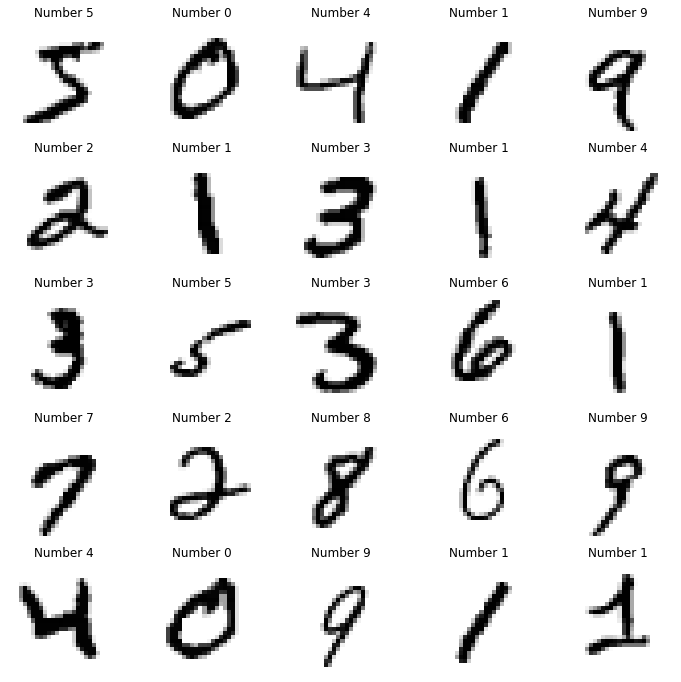

In [53]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig, axs = plt.subplots(5, 5, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
  ax.imshow(traindata[i].reshape((28, 28)), cmap=cm.gray_r)
  ax.axis('off')
  ax.set_title('Number {}'.format(trainlabels[i]))

### (b) PCA

Implement PCA on the whole MNIST dataset and reduce the data dimension from 784 to a smaller value. 

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
fit = scaler.fit(traindata)
std_train = fit.transform(traindata)
std_test = fit.transform(testdata)

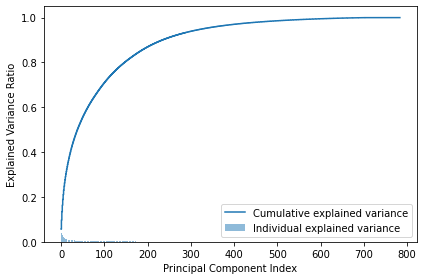

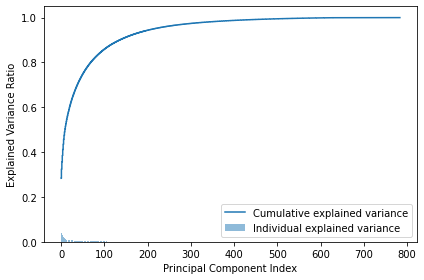

Training dataset reduced dimensions: (50000, 140)
Test dataset reduced dimensions: (10000, 140)


In [55]:
# TODO: implement PCA
import numpy as np
import matplotlib.pyplot as plt

def PCA(X , dim):
  X_mean = X - np.mean(X , axis = 0)
  cov_mat = np.cov(X_mean.T)
  eig_val , eig_vect = np.linalg.eigh(cov_mat)
  desc_sort = np.argsort(eig_val)[::-1]
  sort_eig_val = eig_val[desc_sort]
  sort_eig_vect = eig_vect[:,desc_sort]
  eig_vect_mat = sort_eig_vect[:,0:dim]
  red_X = np.dot(eig_vect_mat.T , X_mean.T).T
  total_eig_values = sum(eig_val)
  var_exp = [(i/total_eig_values) for i in sorted(eig_val, reverse=True)]
  cum_sum_exp = np.cumsum(var_exp)
  plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
  plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
  plt.ylabel('Explained Variance Ratio')
  plt.xlabel('Principal Component Index')
  plt.legend(loc='best')
  plt.tight_layout()
  plt.show()
  return red_X

Red_Train = PCA(std_train , 140)
Red_Test = PCA(std_test , 140)
print("Training dataset reduced dimensions:", Red_Train.shape)
print("Test dataset reduced dimensions:",Red_Test.shape)

**Please type your answers for the discussion questions here.**

Principal Component Analysis (PCA) method is used to reduce a higher dimensional data to a k-dimensional data in machine learning. This is done to increase the speed of the function. After PCA is applied, we check the amount of variance of original dataset that retains in the resulting dataset. Now, the main criteria to select k is that after PCA the retention should be in the range of 90%-99%. In the above problem, after plotting variance to the principal component index its observed that the required retention ie 80% is observed at around 140 principal components. So, the data is reduced from 784D to 140D.

### (a) $k$-Nearest Neighbor Classifier (Supervised Learning)

Implement the $k$-nearest neighbor classifier with Euclidean distance on the MNIST dataset.


In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def knn(traindata, trainlabels, testdata, k=1):
  # TODO: implement k-NN
  mnist = load_digits()
  traindata, testdata, trainlabels, testlabels = train_test_split(np.array(mnist.data),mnist.target,test_size=0.25,random_state=42)
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(traindata, trainlabels)
  preds = knn.predict(testdata)
  print(accuracy_score(testlabels, preds))
  return preds

knn(traindata, trainlabels, testdata, k=1)

0.9822222222222222


array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 3, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 9, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 4, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 1, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

Evaluate the performance by classification accuracy on validation set with different number of training data.

In [57]:
import random

n_entries = [1000, 2000, 5000, 10000, 20000, 50000]
for n_sel in n_entries:
  # randomly select training entries
  sel = random.sample(range(50000), n_sel)
  # TODO: run k-NN using raw training data
  for i in sel:
    rand_data = []
    rand_labels = []
    rand_data.append(traindata[i])
    rand_labels.append(trainlabels[i])
  print(n_sel)
  knn(rand_data, rand_labels, testdata, k=1)
knn_acc_Raw = accuracy_score(trainlabels, sel)
print(knn_acc_Raw)

1000
0.9822222222222222
2000
0.9822222222222222
5000
0.9822222222222222
10000
0.9822222222222222
20000
0.9822222222222222
50000
0.9822222222222222
2e-05


In [58]:
import random
import numpy as np

n_entries = [1000, 2000, 5000, 10000, 20000, 50000]
for n_sel in n_entries:
  # randomly select training entries
  sel = random.sample(range(50000), n_sel)
  # TODO: run k-NN using pca data
  for i in sel:
    rand_data = []
    rand_labels = []
    rand_data.append(traindata[i])
    rand_labels.append(trainlabels[i])
  print(n_sel)
  knn(rand_data, rand_labels, std_test, k=1)
  # TODO: evaluate classification accuracy
knn_acc_PCA = accuracy_score(trainlabels, sel)
print(knn_acc_PCA)

1000
0.9822222222222222
2000
0.9822222222222222
5000
0.9822222222222222
10000
0.9822222222222222
20000
0.9822222222222222
50000
0.9822222222222222
4e-05


Draw the learning curve.

ValueError: ignored

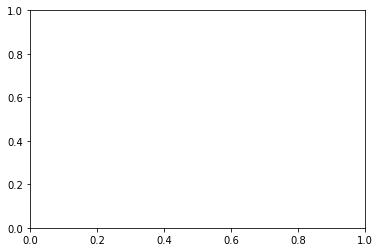

In [59]:
import matplotlib.pyplot as plt
plt.plot(n_entries, knn_acc_Raw, label = "Raw Data")
plt.plot(n_entries, knn_acc_PCA, label = "PCA Data")
plt.xlabel('Entries')
plt.ylabel('Validation accuracy')
plt.title('Learning curve')
plt.legend()
plt.grid()
plt.show()

Evaluate the classification accuracy with different hyperparamter $k$.

In [60]:
kval = np.arange(1,30,2)
for k in kval:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(traindata, trainlabels)
  print(accuracy_score(testlabels, preds))

NameError: ignored

**Please type your answers for the discussion questions here.**

For k nearest neighbour algorithm k=1 means no other class and it gets itself. So, for choosing the best k we should know the number of specified class of differect group of objects to predict a new data.

### (b) $k$-means Clustering (Unsupervised Learning)

Implement $k$-Means clustering algorithm and report classification accuracies.

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[3 1 8 ... 6 5 6]


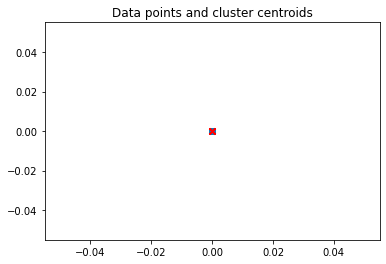

4e-05


In [61]:
n_cluster = 10

# TODO: fit kmeans model
from sklearn.cluster import KMeans
X = traindata
kmeans = KMeans(n_clusters = 10, random_state=0).fit(X)

# TODO: show real digit distribution in each cluster
print(kmeans.cluster_centers_)
print(kmeans.labels_)
plt.scatter(X[:, 0], X[:, -1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.title('Data points and cluster centroids')
plt.show()

# TODO: evaluate accuracy
kmean_acc = accuracy_score(trainlabels, sel)
print(kmean_acc)

Improve the clustering performance by using different $k$ and adding splitting and grouping strategies.

In [62]:
kval = np.arange(1,30,2)
for k in kval:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(traindata, trainlabels)
  score = knn.score(traindata, trainlabels)
  print("k=%d, accuracy=%.2f%%" % (k, score * 100))
  print(classification_report(testlabels,preds))

k=1, accuracy=100.00%


NameError: ignored

Infer $k$-Means results on the testing set. Evaluate performance.

In [ ]:
print("k=%d, accuracy=%.2f%%" % (k, score * 100))
print(classification_report(testlabels,preds))

**Please type your answers for the discussion questions here.**

The number of k decides the number of clusters. Each clusters has a particular centroid. The centroids of the k-mean clustering converges to a local minima. Hence, we have to decide the best k for proper clustering. Here, the input k does the same thing and hence due to this the accuracy is not so good at k=10.

### (c) Discussion

**Please type your answers for the discussion questions here.**

#Differences between Supervised and Unsupervised learning
1. Supervised learning algorithms use labeled and trained datasets to compute the desired target or output whereas Unsupervised learning algorithm discovers the hidden patterns and structures from the input. In other words, for supervised learning the output is provided along with the inputs and hence the algorithm works with previous experiences. But for unsupervised learning the outputs are not provided and the algorithm clusters or associates the data along with similar data groups.
2. Supervised learning requires supervision to train its data and to predict the outputs. But unsupervised learning doesn't require any supervision (but requires manual interventions to improve clustering) as it trains the data through the input data and discovers different patterns. Hence, unsupervised learning is used to compute complex algorithms where target is not known. 
3. Supervised learning is a kind of offline analysis whereas unsupervised learning works in real time.
4. k-NN is a type of supervised classification technique, whereas, PCA and k mean are types of unsupervised learning used for dimensionality reduction and clustering respectively. k-NN is used to classify a data point according to a predefined neighbor class. In k mean, the data is grouped into k clusters where each data points in the cluster are near to each other .   
5. Supervised learning provides more accurate and reliable results than unsupervised learning.


#How to choose hyperparameters k for Machine Learning
1. Firstly, the data is split into training and test data subsets.
2. Now, the loop is repeatedly optimized a number of times or until a condition is met
3. After optimization and finding the accuracy of the outputs the hyperparameters are chosen for best reultant output.